In [1]:
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
import requests

# Connect to ArcGIS Online
gis = GIS("home")

# Specify the item ID and layer ID (replace with the correct IDs)
item_id = 'a58386ecf0404dd09a4abc0bcd607561'  # Replace with your item ID
layer_id = '0'  # Replace with the correct sublayer ID if applicable

# Get the item
item = gis.content.get(item_id)

# Access the feature layer
feature_layer = FeatureLayer(item.layers[int(layer_id)].url)

# Define the query parameters
params = {
    'where': '1=1',  # Query all records
    'outFields': '*',  # All fields
    'f': 'geojson'  # Output format
}

# Query the feature layer
response = feature_layer.query(**params)

# Save the GeoJSON data to a file
geojson_data = response.to_geojson()
with open('data.geojson', 'w') as f:
    f.write(geojson_data)


/opt/anaconda3/envs/VIZ/lib/python3.10/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


ImportError: The login failed because the arcpy library could not be found in your Python environment. Try logging in with a different set of credentials.

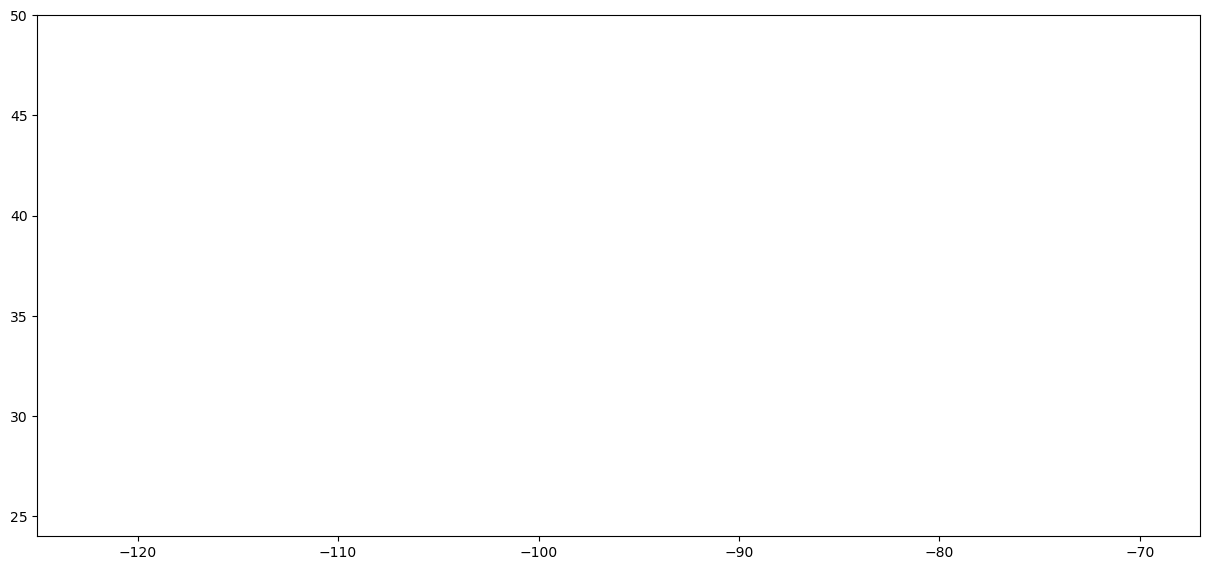

In [54]:
# import pandas as pd
# import numpy as np
# import geopandas as gpd
# import matplotlib.pyplot as plt
# %matplotlib inline

# df_places = gpd.read_file('../data/raw/ch-districts.geojson_BA.geojson')

# df_places['geometry']

# merged_df['Count_Placeholder'] = 0
# merged_df['Count_Placeholder'][:1700] = np.random.randint(7, size=1700)


# import geopandas as gpd
# import matplotlib.pyplot as plt
# import pandas as pd
# import json

# # Load the data
# data = {
#     'BEZIRKSNUM': [1901, 1843],  # Ensure this column name matches the GeoJSON property
#     'EINWOHNERZ': [78305, 92000]
# }
# df = pd.DataFrame(data)

# # Load the GeoJSON file
# with open('../data/raw/ch-districts.geojson') as f:
#     geojson_data = json.load(f)

# # Convert GeoJSON to GeoDataFrame
# gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

# # Rename columns if necessary to match
# gdf = gdf.rename(columns={"properties.BEZIRKSNUM": "BEZIRKSNUM"})

# # Merge GeoDataFrame with DataFrame, handling column overlaps
# merged = gdf.merge(df, on='BEZIRKSNUM', how='left')

# # Plot
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# merged.plot(column='EINWOHNERZ', ax=ax, legend=True,
#             legend_kwds={'label': "Population by District",
#                          'orientation': "horizontal"})
# ax.set_title("Choropleth Map of Population by District")
# plt.show()


In [8]:
# import requests
# import pandas as pd

# # Fetch the GeoJSON data from the ArcGIS link
# url = "https://opendata.arcgis.com/api/v3/datasets/36e3c254f5f24484af16d2820014e5a1_0/downloads/data?format=geojson&spatialRefId=4326"
# geojson_data = requests.get(url).json()

# # Normalize and extract relevant information
# df = (
#     pd.json_normalize(geojson_data["features"])
#     .loc[
#         :,  # Here, you can filter by any property if needed (like districts or languages)
#         ["properties.NAME", "geometry.coordinates"]  # Adjust the columns based on what's in the dataset
#     ]
#     .assign(
#         lon=lambda d: d["geometry.coordinates"].apply(lambda v: v[0]),
#         lat=lambda d: d["geometry.coordinates"].apply(lambda v: v[1]),
#     )
# )

# # Display the dataframe
# print(df)



import streamlit as st
import pandas as pd
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import os
import json

data = {
    'BEZIRKSNUM': [1901, 1843],  # Example district number (must match "BEZIRKSNUM" in GeoJSON)
    'EINWOHNERZ': [78305, 92000]  # Example population data to map
}
df = pd.DataFrame(data)

with open('../data/raw/ch-districts.geojson ') as f:
    geojson_data = json.load(f)

# Create the choropleth map using Plotly Express
fig = px.choropleth_mapbox(df,
                           geojson=geojson_data,
                           locations='BEZIRKSNUM', # this must match featureidkey
                           featureidkey="properties.BEZIRKSNUM",  # This must match the property in your GeoJSON
                           color='EINWOHNERZ',
                           mapbox_style="carto-positron",
                           center={"lat": 47.0, "lon": 8.0},  # Switzerland coordinates
                           zoom=7)

# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()


FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/ch-districts.geojson '